# Measuring word frequency in songs over time

Dataset: https://data.mendeley.com/datasets/3t9vbwxgr5/2

### Preprocessing

In [3]:
import pandas as pd
 
df = pd.read_csv('tcc_ceds_music.csv')
df.head()

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,...,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,sadness,1.0
1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,...,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,world/life,1.0
2,6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,...,0.002770,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,music,1.0
3,10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,...,0.225889,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,romantic,1.0
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,...,0.068800,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,romantic,1.0


In [4]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
unique_years = df["release_date"].unique()

### Average instances of word per song

In [9]:
def count_word(word):
    counts = []
    for year in unique_years:
        count = 0
        sub_df = df.loc[df["release_date"]==year]
        lyrics = sub_df["lyrics"].to_list()
        for lyric in lyrics:
            words = lyric.split()
            for word2 in words:
                if word2 == word:
                    count += 1
    
        value = count/sub_df.shape[0]
        #print(year, count, value)
        counts.append(value)
  
    plt.figure(figsize=(10,6))
    plt.plot(unique_years, counts)
    #plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
    plt.title("Use of Word '{}' in Song Lyrics Over Time".format(word), fontsize=20)
    plt.ylabel("Average instances of word per song")
    plt.xlabel("Year")

#### Examples

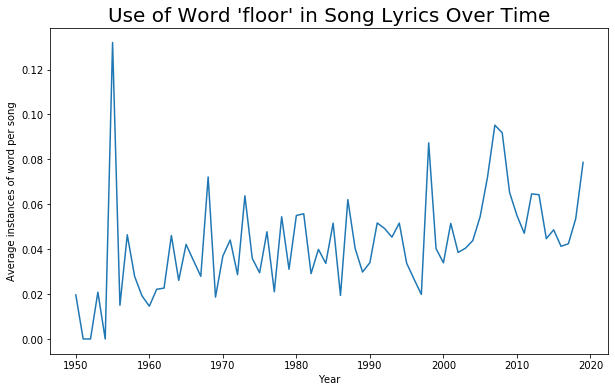

In [10]:
count_word("floor")

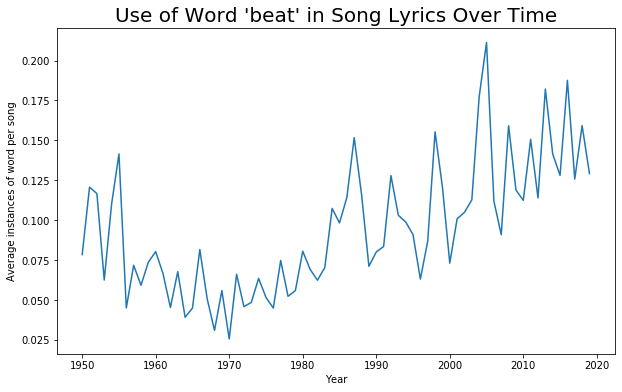

In [11]:
count_word("beat")

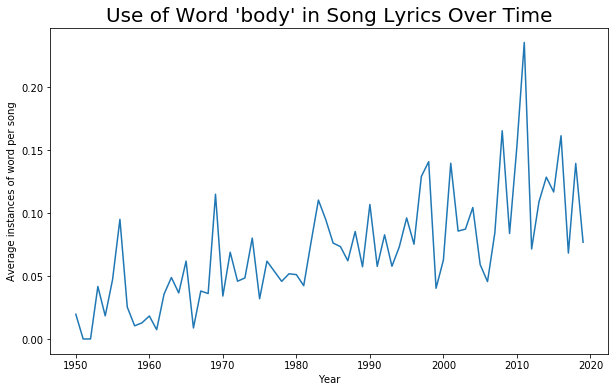

In [12]:
count_word("body")

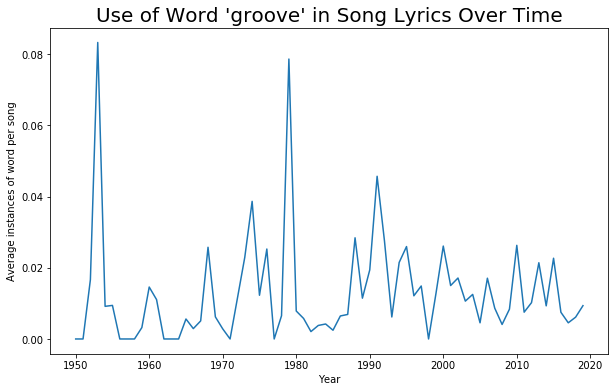

In [13]:
count_word("groove")

### Another way of measuring it: Proportion of songs containing word


In [17]:
def count_proportion(word):
    counts = []
    for year in unique_years:
        instances = []
        sub_df = df.loc[df["release_date"]==year]
        lyrics = sub_df["lyrics"].to_list()
        for lyric in lyrics:
            words = lyric.split()
            if word in words:
                instances.append(True)
            else:
                instances.append(False)
        value = sum(instances)/sub_df.shape[0]
        counts.append(value)
  
    plt.figure(figsize=(10,6))
    plt.plot(unique_years, counts)
    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
    plt.title("Use of Word '{}' in Song Lyrics Over Time".format(word), fontsize=20)
    plt.ylabel("Proportion of songs containing word")
    plt.xlabel("Year")

#### Examples

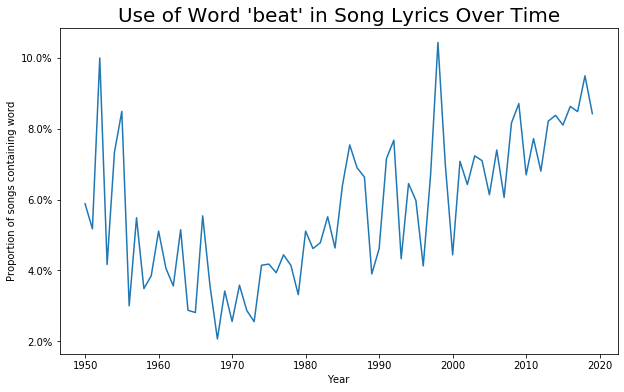

In [18]:
count_proportion("beat")